In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dengue.csv')
dataset.head()

,dengue.p_i_d,dengue.date_of_fever,dengue.residence,dengue.days,dengue.current_temp,dengue.wbc,dengue.servere_headche,dengue.pain_behind_the_eyes,dengue.joint_muscle_aches,dengue.metallic_taste_in_the_mouth,dengue.appetite_loss,dengue.addominal_pain,dengue.nausea_vomiting,dengue.diarrhoea,dengue.hemoglobin,dengue._hematocri,dengue.platelet,dengue.dengue
0,P012,13-Jan,Bangalore,10 days,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,NaN,140.0,yes
1,P011,13-Feb,New Delhi,4 days,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22.0,80.0,no
2,P010,9-Jan,Jamica,5 days,104.0,5.0,NaN,no,no,yes,yes,yes,yes,no,NaN,NaN,120.0,yes
3,P009,12-Aug,Barbados,12 months,101.0,NaN,yes,yes,no,no,no,no,no,no,NaN,NaN,NaN,no
4,P008,12-Oct,St.Martin,3 days,101.0,NaN,yes,no,no,no,no,no,yes,no,NaN,NaN,NaN,no


#### Data Pre-Process

##### Missing Data Replacement = Data Imputation

In [3]:
for i in range(len(dataset.columns)):
  missing_data = dataset[dataset.columns[i]].isna().sum()
  perc = missing_data / len(dataset) * 100
  print(f'> Columns {i}[{dataset.columns[i]}], missing entries: {missing_data}, percentage {perc}%')

> Columns 0[dengue.p_i_d], missing entries: 0, percentage 0.0%
> Columns 1[dengue.date_of_fever], missing entries: 0, percentage 0.0%
> Columns 2[dengue.residence], missing entries: 0, percentage 0.0%
> Columns 3[dengue.days], missing entries: 9, percentage 8.333333333333332%
> Columns 4[dengue.current_temp], missing entries: 0, percentage 0.0%
> Columns 5[dengue.wbc], missing entries: 63, percentage 58.333333333333336%
> Columns 6[dengue.servere_headche], missing entries: 18, percentage 16.666666666666664%
> Columns 7[dengue.pain_behind_the_eyes], missing entries: 0, percentage 0.0%
> Columns 8[dengue.joint_muscle_aches], missing entries: 9, percentage 8.333333333333332%
> Columns 9[dengue.metallic_taste_in_the_mouth], missing entries: 0, percentage 0.0%
> Columns 10[dengue.appetite_loss], missing entries: 0, percentage 0.0%
> Columns 11[dengue.addominal_pain], missing entries: 0, percentage 0.0%
> Columns 12[dengue.nausea_vomiting], missing entries: 0, percentage 0.0%
> Columns 13[de

<Axes: >

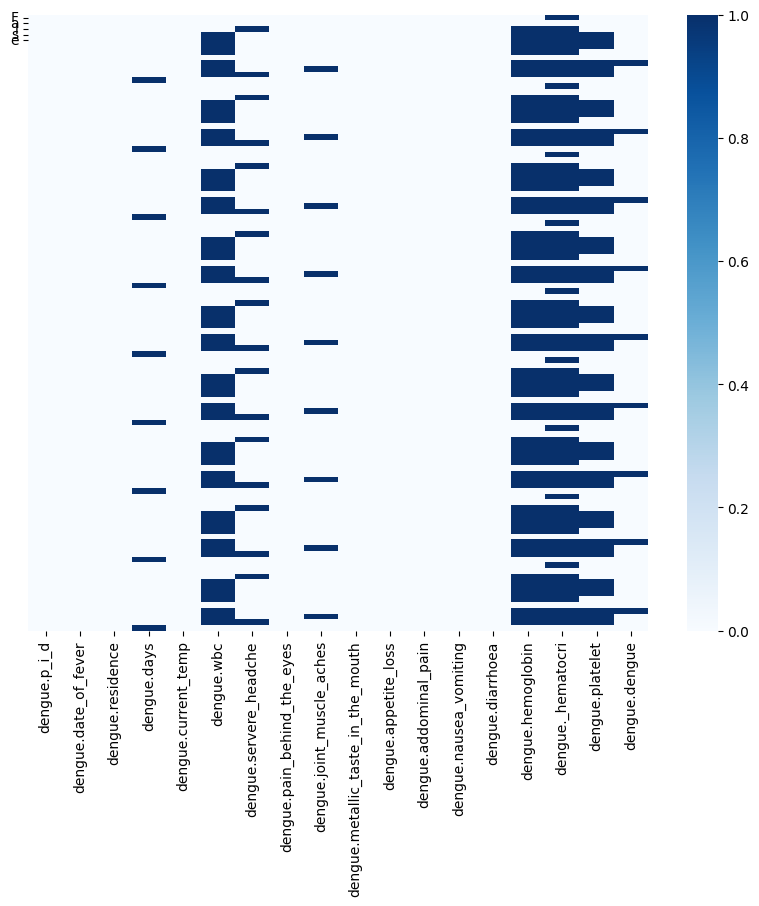

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset.isna(), cmap='Blues', cbar='False', yticklabels='False')

In [5]:
def process_days(x):
    if pd.isna(x):
        return np.nan
    if 'days' in x:
        return int(x.split(' days')[0])
    if 'weeks' in x:
        return int(x.split(' weeks')[0]) * 7
    if 'months' in x:
        return int(x.split(' months')[0]) * 30
    if '--' in x:
        return int(x.split('--')[1])
    return np.nan

In [6]:
X = dataset.iloc[:, :-1]
X['dengue.days'] = X['dengue.days'].apply(process_days)
X = X.drop(columns=['dengue.p_i_d', 'dengue.date_of_fever', 'dengue.residence'])

In [7]:
y = dataset.iloc[:,-1].values
print(y)

['yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes'
 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes'
 'no' 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no'
 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no'
 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes'
 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes'
 nan 'yes' 'yes' 'yes']


In [8]:
continuous_columns = []
categorical_columns = []

for col in X.columns:
    if np.dtype(X[col]) == 'float64':
        continuous_columns.append(X.columns.get_loc(col))
    if np.dtype(X[col]) == 'object':
        categorical_columns.append(X.columns.get_loc(col))

continuous_columns

[0, 1, 2, 11, 12, 13]

In [9]:
X = X.values

In [10]:
from sklearn.impute import SimpleImputer

imputerContinue = SimpleImputer(missing_values=np.nan, strategy='mean')
imputerClassifies = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X[:, continuous_columns] = imputerContinue.fit_transform(X[:, continuous_columns])
X[:, categorical_columns] = imputerClassifies.fit_transform(X[:, categorical_columns])

X

array([[10.0, 100.0, 5.0, ..., 15.0, 23.333333333333332, 140.0],
       [4.0, 104.0, 1.0, ..., 9.0, 22.0, 80.0],
       [5.0, 104.0, 5.0, ..., 10.65, 23.333333333333332, 120.0],
       ...,
       [14.0, 101.0, 3.64, ..., 10.65, 23.333333333333332, 105.0],
       [4.0, 105.0, 3.64, ..., 10.65, 23.333333333333332, 105.0],
       [38.54545454545455, 0.0, 5.0, ..., 8.6, 23.0, 90.0]], dtype=object)

##### Encode Categorical Data

In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(y)
# y = le.fit_transform(y)
# y
X_raw = 0

['yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes'
 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes'
 'no' 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no'
 'no' 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no'
 'yes' 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes'
 'yes' 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' nan 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes'
 nan 'yes' 'yes' 'yes']
